# Постановка задачи
Пусть есть n шариков и m урн.

Выбор урны для каждого шарика - с одинаковой вероятностью, независимо от других шариков.

Для произвольных чисел k, l >= 0, k + l <= m, найти вероятность, что ровно k урн будут пустыми, l - содержать ровно по одному шарику, m-k-l - 2 и больше шариков.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from analitica import analit_probs_k_l
from monte_carlo import probs_k_l

In [2]:
URNS_NUMBER = 10
BALLS_NUMBER = 5

NUM_TRIALS = 10_000

# Аналитическое решение
Пусть $P_k$ - вероятность того, что урна будет пустой и

$P_l$ - вероятность того, что в урне будет 1 шарик.

Тогда в соответствии с формулой на листике Андрея:

$P_k = P_k(k,n,m)$

$P_l = P_l(k,l,n,m) = P_k(k,n,m) * P(l,n-(m-k),m-k)$

Если $P_k=\frac{C^k_m*C^n_{m-k}}{m^n}$, то тогда $P_l=\frac{C^k_m*C^n_{m-k}}{m^n}*\frac{C^l_{m-k}*C^{n-(m-k)}_{m-k-l}}{(m-k)^{n-(m-k)}}$

Для каждого вычисления нам дано колчисество урн и количество шариков. При этом, как видно из формул, вероятности также зависят от переменных k и l. Они нам неизвестны. Для решения этой проблемы, мы перебираем все возможные варианты этих переменных. Для каждого k мы вычисляем своём значение $P_{ki}$, после чего находим математеческое ожиданием всех $P_{ki}$ и получаем $P_k$. Далее для $P_l$ нужно для каждого l найти $P_{kli}$, где k - фиксировано. После вычисления математического ожидания для всех $P_{kli}$ мы получаем $P_{ki}$. Далее находим мат.ожидание всех $P_{ki}$ и получаем, наконец, результирующую вероятность $P_{l}$

# Аналитический расчёт

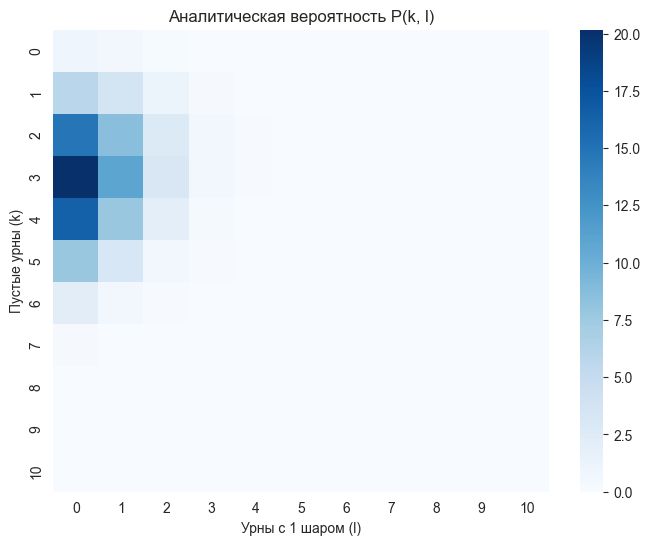

In [3]:
prob_matrix = analit_probs_k_l(URNS_NUMBER, BALLS_NUMBER)

plt.figure(figsize=(8, 6))
sns.heatmap(prob_matrix, annot=False, fmt=".5f", cmap="Blues")
plt.xlabel("Урны с 1 шаром (l)")
plt.ylabel("Пустые урны (k)")
plt.title("Аналитическая вероятность P(k, l)")
plt.show()

# Валидация методом Монте-Карло

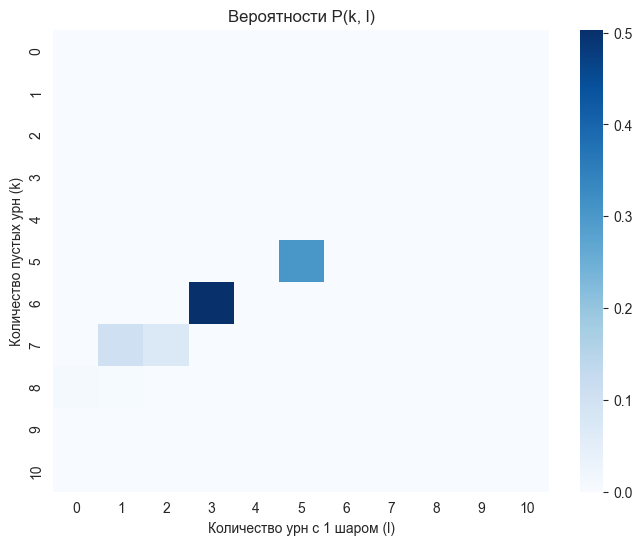

In [4]:
num_trials = 100_000  # Количество экспериментов
results = probs_k_l(NUM_TRIALS, BALLS_NUMBER, URNS_NUMBER)

plt.figure(figsize=(8, 6))
sns.heatmap(results, fmt=".3f", cmap="Blues", xticklabels=range(URNS_NUMBER + 1),
            yticklabels=range(URNS_NUMBER + 1))
plt.xlabel("Количество урн с 1 шаром (l)")
plt.ylabel("Количество пустых урн (k)")
plt.title("Вероятности P(k, l)")
plt.show()

# Вопросы

1) Почему $P_l = P_l(k,l,n,m) = P_k(k,n,m) * P(l,n-(m-k),m-k)$?
Особенно непонятно, почему для $P_l$ количество шариков не n, а n-(m-k). Во-первых, количество шариков осталось неизменным (так как первую вероятность мы считали для пустых урн), во-вторых, n - это количество шариков, а (m-k) - это количество непустых урн, то есть мы из мух вычитаем котлеты.

2) Правильная ли формула для комбинаторного вычисления $P_k$ и $P_l$? Рассуждения по их получению есть в фотографиях.

3) Правильна ли логика по получению значений вероятности с помощью математического ожидания?